# Loading the Data

In [1]:
import os
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# === Paths ===
image_folder = "C://Users//abc//Desktop//appendicitis data//US_Pictures"  # Folder where .bmp images are extracted
metadata_file = "C://Users//abc//Documents//Downloads//app_data.xlsx"

In [68]:
# === Load metadata ===
df = pd.read_excel(metadata_file)
df.head(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
5,11.05,30.7,male,121.0,45.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8.98,19.4,female,140.0,38.5,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.06,NaN,female,NaN,21.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,re UB,no,NaN,NaN,NaN,NaN,NaN,NaN
8,7.90,15.7,male,131.0,26.7,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
9,14.34,14.9,male,174.0,45.5,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df = df.dropna(subset=['US_Number'])
df = df.dropna(subset=['Diagnosis'])  # remove unlabeled rows

In [70]:
# 2. One-hot encode the label columns and merge with original DataFrame
labels_one_hot = pd.get_dummies(df[['Diagnosis', 'Severity', 'Management']])
df = pd.concat([df[['US_Number']], labels_one_hot], axis=1)

In [71]:
labels_one_hot

,Diagnosis_appendicitis,Diagnosis_no appendicitis,Severity_complicated,Severity_uncomplicated,Management_conservative,Management_primary surgical,Management_secondary surgical
0,True,False,False,True,True,False,False
1,False,True,False,True,True,False,False
2,False,True,False,True,True,False,False
3,False,True,False,True,True,False,False
4,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...
775,True,False,True,False,False,True,False
777,True,False,False,True,False,True,False
779,True,False,False,True,False,True,False
780,True,False,False,True,False,True,False


# Data Pre-processing

In [72]:
#assigning the labes to images basis matching file name to 'US_Number' column in the xlsx file 


# Store images and labels
images = []
labels = []

for _, row in df.iterrows():
    us_number = int(row['US_Number'])
    label = row.drop('US_Number').values  # all one-hot columns


    # Match image files like US_001.1.bmp, US_001.2.bmp, etc.
    pattern = os.path.join(image_folder, f"{us_number}.*")
    matches = sorted(glob.glob(pattern))
    matches = [m for m in matches if m.lower().endswith(('.bmp', '.png'))]

    for filepath in matches:
    #if matches:
        #filepath = matches[0]
        img = Image.open(filepath).convert('L')
        img = img.resize((128, 128))
        img_array = np.array(img) / 255.0
        images.append(img_array)
        labels.append(label)

# Convert to arrays
X = np.array(images).reshape(-1, 128, 128, 1)
y = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Label shape:", y_train.shape)

Training set size: (1375, 128, 128, 1)
Testing set size: (344, 128, 128, 1)
Label shape: (1375, 7)


In [73]:
#print(os.listdir(image_folder))

In [74]:
#converting label to boolean
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [10]:
#Data augmentation since the number of images are very low
#will use this function directly during model training since it creates augmented images on the fly 

datagen = ImageDataGenerator(
    rotation_range=20,        # random rotation
    width_shift_range=0.1,    # horizontal shift
    height_shift_range=0.1,   # vertical shift
    zoom_range=0.1,           # random zoom
    horizontal_flip=True,     # flip image horizontally
    vertical_flip=True,       # flip image vertically
    fill_mode='nearest'       # fill in missing pixels
)

# Creating the model

In [49]:
# Input image shape
input_shape = (128, 128, 1)  # Grayscale images

# Output layer size = number of one-hot encoded columns (7 in your case)
output_size = y_train.shape[1]  # should be 7

model = Sequential([
    # Input + 1st Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    # 2nd Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # 3rd Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Optional: helps prevent overfitting

    # Output layer: sigmoid for multi-label
    Dense(output_size, activation='sigmoid')
])

In [50]:
#compiling the model with optimizer and loss function
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision', 'Recall', 'AUC'])

In [51]:
#training the model
from tensorflow.keras.callbacks import History

# Create the History callback to track training and validation losses 
history = History()
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=15, callbacks=[history])

Epoch 1/15
43/43 [==============================] - 40s 794ms/step - loss: 0.5288 - accuracy: 0.1869 - precision: 0.7057 - recall: 0.6696 - auc: 0.8111 - val_loss: 0.4804 - val_accuracy: 0.0000e+00 - val_precision: 0.7668 - val_recall: 0.6948 - val_auc: 0.8486
Epoch 2/15
43/43 [==============================] - 60s 1s/step - loss: 0.5086 - accuracy: 0.1055 - precision: 0.7307 - recall: 0.6827 - auc: 0.8260 - val_loss: 0.4765 - val_accuracy: 0.0000e+00 - val_precision: 0.7345 - val_recall: 0.7345 - val_auc: 0.8511
Epoch 3/15
43/43 [==============================] - 31s 708ms/step - loss: 0.5056 - accuracy: 0.0938 - precision: 0.7263 - recall: 0.6863 - auc: 0.8276 - val_loss: 0.4782 - val_accuracy: 0.0000e+00 - val_precision: 0.7617 - val_recall: 0.6783 - val_auc: 0.8489
Epoch 4/15
43/43 [==============================] - 28s 650ms/step - loss: 0.5019 - accuracy: 0.1367 - precision: 0.7269 - recall: 0.6776 - auc: 0.8295 - val_loss: 0.4777 - val_accuracy: 0.0000e+00 - val_precision: 0.734

# Visualising Metrics

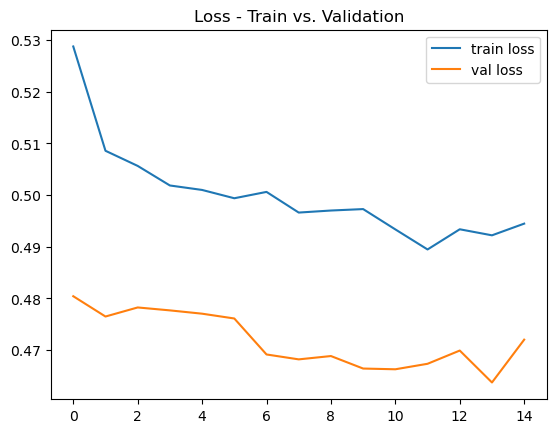

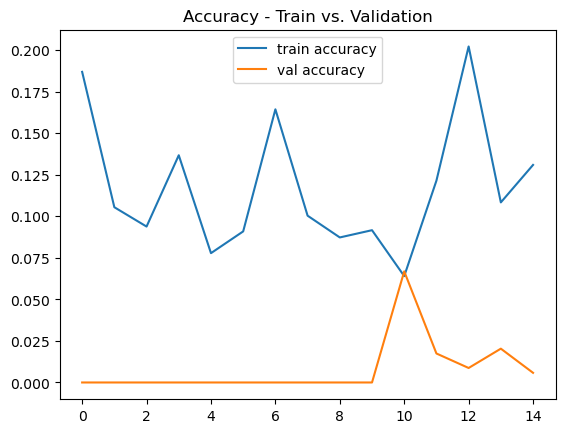

In [52]:
#training vs trsting plots to check for over/under fitting
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss - Train vs. Validation")
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title("Accuracy - Train vs. Validation")
plt.show()


In [29]:
#getting the other metrics
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Get classification report (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred))

11/11 [==============================] - 2s 113ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

# Hyperparameter Tuning

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # helps reduce overfitting
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')  # for multi-label
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
#training the new model
# Create the History callback to track training and validation losses 
history = History()
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=15, callbacks=[history])

Epoch 1/15
43/43 [==============================] - 26s 533ms/step - loss: 0.5572 - accuracy: 0.1338 - val_loss: 0.4903 - val_accuracy: 0.0000e+00
Epoch 2/15
43/43 [==============================] - 22s 496ms/step - loss: 0.5139 - accuracy: 0.1818 - val_loss: 0.4854 - val_accuracy: 0.0000e+00
Epoch 3/15
43/43 [==============================] - 23s 542ms/step - loss: 0.5109 - accuracy: 0.1993 - val_loss: 0.4797 - val_accuracy: 0.0000e+00
Epoch 4/15
43/43 [==============================] - 22s 509ms/step - loss: 0.5089 - accuracy: 0.1273 - val_loss: 0.4768 - val_accuracy: 0.0000e+00
Epoch 5/15
43/43 [==============================] - 24s 550ms/step - loss: 0.5086 - accuracy: 0.1993 - val_loss: 0.4755 - val_accuracy: 0.0000e+00
Epoch 6/15
43/43 [==============================] - 23s 542ms/step - loss: 0.5046 - accuracy: 0.1571 - val_loss: 0.4740 - val_accuracy: 0.0000e+00
Epoch 7/15
43/43 [==============================] - 22s 502ms/step - loss: 0.5038 - accuracy: 0.1702 - val_loss: 0.472

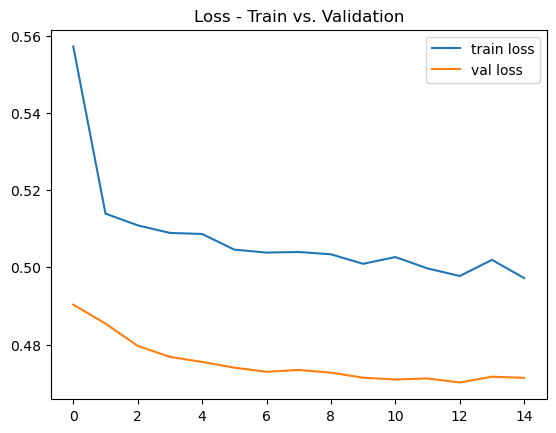

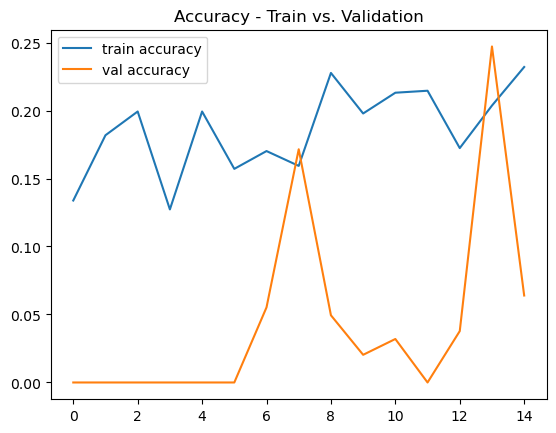

In [55]:
#training vs testing plots to check for over/under fitting in new model
# Plot training & validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss - Train vs. Validation")
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title("Accuracy - Train vs. Validation")
plt.show()


11/11 [==============================] - 4s 162ms/step


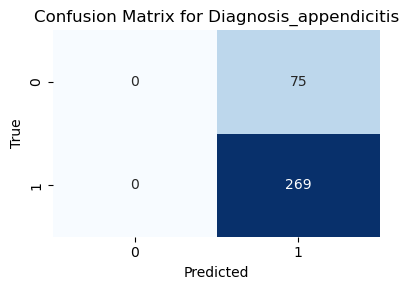

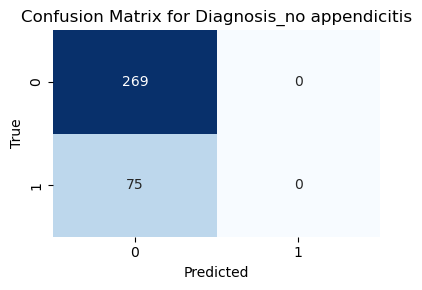

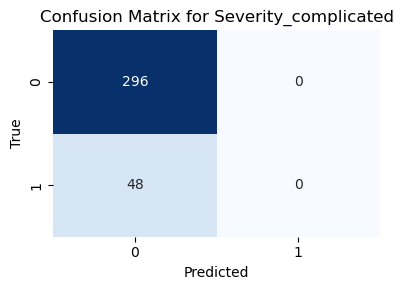

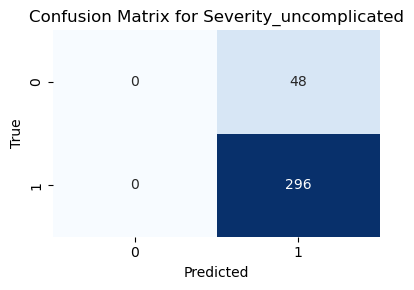

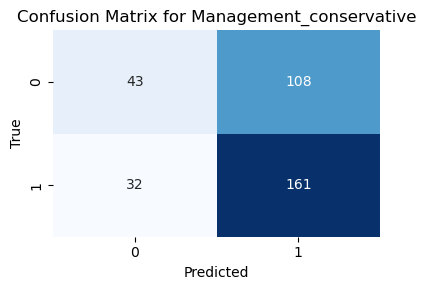

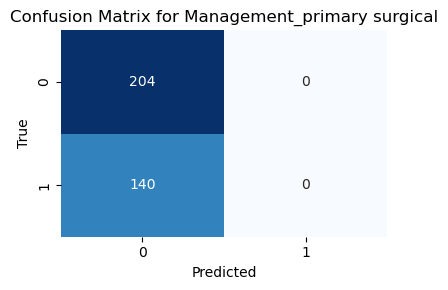

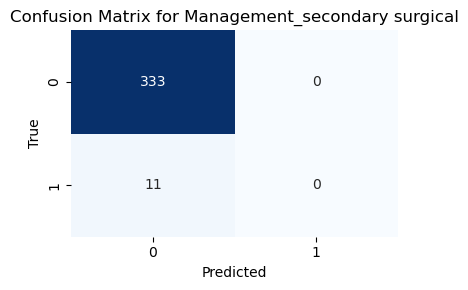

In [56]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions (rounded for binary multi-label)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the label names
label_names = df.drop('US_Number', axis=1).columns.tolist()

# Get confusion matrices for each label
conf_matrices = multilabel_confusion_matrix(y_test, y_pred_binary)

# Plot each confusion matrix
for i, cm in enumerate(conf_matrices):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {label_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()


# Adding other tabular columns

In [11]:
#since the accuracy is reletively low, we will add the tabular data as well

In [12]:
df_new=df = pd.read_excel(metadata_file)
df_new.head(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
5,11.05,30.7,male,121.0,45.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8.98,19.4,female,140.0,38.5,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.06,NaN,female,NaN,21.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,re UB,no,NaN,NaN,NaN,NaN,NaN,NaN
8,7.90,15.7,male,131.0,26.7,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
9,14.34,14.9,male,174.0,45.5,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
temp=df_new

In [14]:
#Data preprocessing for tabular input

In [15]:
nan_cols = df_new.columns[df.isna().mean() > 0.5]
print(nan_cols)

Index(['Segmented_Neutrophils', 'Appendix_Wall_Layers', 'Target_Sign',
       'Appendicolith', 'Perfusion', 'Perforation',
       'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus',
       'Coprostasis', 'Meteorism', 'Enteritis', 'Gynecological_Findings'],
      dtype='object')


In [16]:
#dropping columns where >50% are NaN 
df_new=df_new.drop(['Segmented_Neutrophils', 'Appendix_Wall_Layers', 'Target_Sign',
       'Appendicolith', 'Perfusion', 'Perforation',
       'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus',
       'Coprostasis', 'Meteorism', 'Enteritis', 'Gynecological_Findings'], axis=1)

In [17]:
df_new.isna().mean()*100

Age                                  0.127877
BMI                                  3.452685
Sex                                  0.255754
Height                               3.324808
Weight                               0.383632
Length_of_Stay                       0.511509
Management                           0.127877
Severity                             0.127877
Diagnosis_Presumptive                0.255754
Diagnosis                            0.255754
Alvarado_Score                       6.649616
Paedriatic_Appendicitis_Score        6.649616
Appendix_on_US                       0.639386
Appendix_Diameter                   36.317136
Migratory_Pain                       1.150895
Lower_Right_Abd_Pain                 1.023018
Contralateral_Rebound_Tenderness     1.918159
Coughing_Pain                        2.046036
Nausea                               1.023018
Loss_of_Appetite                     1.278772
Body_Temperature                     0.895141
WBC_Count                         

In [18]:
nan_cols = df_new.columns[df_new.isna().mean() > 0.1]
print(nan_cols)

Index(['Appendix_Diameter', 'Neutrophil_Percentage', 'Ketones_in_Urine',
       'RBC_in_Urine', 'WBC_in_Urine', 'Ipsilateral_Rebound_Tenderness'],
      dtype='object')


In [19]:
#adding appendix diameter basis reaserch 
df_new['Appendix_Diameter'] = df_new['Appendix_Diameter'].fillna(6.5)
df_new['Neutrophil_Percentage'][df['Diagnosis_Presumptive']=='appendicitis'] = df_new['Neutrophil_Percentage'][df['Diagnosis_Presumptive']=='appendicitis'].fillna(80.0)
df_new['Neutrophil_Percentage'][df['Diagnosis_Presumptive']!='appendicitis'] = df_new['Neutrophil_Percentage'][df['Diagnosis_Presumptive']!='appendicitis'].fillna(40.0)
df_new['Ipsilateral_Rebound_Tenderness']=df_new['Ipsilateral_Rebound_Tenderness'].fillna('Inconclusive')
df_new['RBC_in_Urine']=df_new['RBC_in_Urine'].fillna('Inconclusive')
df_new['WBC_in_Urine']=df_new['WBC_in_Urine'].fillna('Inconclusive')
df_new['Ketones_in_Urine']=df_new['Ketones_in_Urine'].fillna('Inconclusive')
df_new['Paedriatic_Appendicitis_Score']=df_new['Paedriatic_Appendicitis_Score'].fillna(df_new['Paedriatic_Appendicitis_Score'].mode()[0])
df_new['Alvarado_Score']=df_new['Alvarado_Score'].fillna(df_new['Alvarado_Score'].mode()[0])

C:\Users\abc\AppData\Local\Temp\ipykernel_2132\538235152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Neutrophil_Percentage'][df['Diagnosis_Presumptive']=='appendicitis'] = df_new['Neutrophil_Percentage'][df['Diagnosis_Presumptive']=='appendicitis'].fillna(80.0)
C:\Users\abc\AppData\Local\Temp\ipykernel_2132\538235152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Neutrophil_Percentage'][df['Diagnosis_Presumptive']!='appendicitis'] = df_new['Neutrophil_Percentage'][df['Diagnosis_Presumptive']!='appendicitis'].fillna(40.0)


In [20]:
nan_cols = df_new.columns[df_new.isna().mean() > 0.1]
print(nan_cols)

Index([], dtype='object')


In [21]:
df_new.isna().mean()*100

Age                                 0.127877
BMI                                 3.452685
Sex                                 0.255754
Height                              3.324808
Weight                              0.383632
Length_of_Stay                      0.511509
Management                          0.127877
Severity                            0.127877
Diagnosis_Presumptive               0.255754
Diagnosis                           0.255754
Alvarado_Score                      0.000000
Paedriatic_Appendicitis_Score       0.000000
Appendix_on_US                      0.639386
Appendix_Diameter                   0.000000
Migratory_Pain                      1.150895
Lower_Right_Abd_Pain                1.023018
Contralateral_Rebound_Tenderness    1.918159
Coughing_Pain                       2.046036
Nausea                              1.023018
Loss_of_Appetite                    1.278772
Body_Temperature                    0.895141
WBC_Count                           0.767263
Neutrophil

In [22]:
df_new.dtypes

Age                                 float64
BMI                                 float64
Sex                                  object
Height                              float64
Weight                              float64
Length_of_Stay                      float64
Management                           object
Severity                             object
Diagnosis_Presumptive                object
Diagnosis                            object
Alvarado_Score                      float64
Paedriatic_Appendicitis_Score       float64
Appendix_on_US                       object
Appendix_Diameter                   float64
Migratory_Pain                       object
Lower_Right_Abd_Pain                 object
Contralateral_Rebound_Tenderness     object
Coughing_Pain                        object
Nausea                               object
Loss_of_Appetite                     object
Body_Temperature                    float64
WBC_Count                           float64
Neutrophil_Percentage           

In [23]:
#ordinal encoding for features that we believe have direct impact on output basis research
df_new['Migratory_Pain'] = df_new['Migratory_Pain'].map({'no': 0, 'yes': 1})
df_new['Lower_Right_Abd_Pain'] = df_new['Lower_Right_Abd_Pain'].map({'no': 0, 'yes': 1})
df_new['Couging_Pain'] = df_new['Coughing_Pain'].map({'no': 0, 'yes': 1})
df_new['Nausea'] = df_new['Nausea'].map({'no': 0, 'yes': 1})
df_new['Loss_of_Appetite'] = df_new['Loss_of_Appetite'].map({'no': 0, 'yes': 1})
df_new['Ketones_in_Urine'] = df_new['Ketones_in_Urine'].map({'no': 0, '+': 1, '++':2, '+++':3, 'Inconclusive':0})
df_new['RBC_in_Urine'] = df_new['RBC_in_Urine'].map({'no': 0, '+': 1, '++':2, '+++':3, 'Inconclusive':0})
df_new['WBC_in_Urine'] = df_new['WBC_in_Urine'].map({'no': 0, '+': 1, '++':2, '+++':3, 'Inconclusive':0})
df_new['Dysuria'] = df_new['Dysuria'].map({'no': 0, 'yes': 1})

In [24]:
#one-hot encoding for the features we are unsure about
df_new = pd.get_dummies(df_new, columns=['Stool','Peritonitis', 'Psoas_Sign' ,'Ipsilateral_Rebound_Tenderness'], drop_first=True)

In [25]:
df_new.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Free_Fluids,Couging_Pain,"Stool_constipation, diarrhea",Stool_diarrhea,Stool_normal,Peritonitis_local,Peritonitis_no,Psoas_Sign_yes,Ipsilateral_Rebound_Tenderness_no,Ipsilateral_Rebound_Tenderness_yes
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,no,0.0,False,False,True,False,True,True,True,False
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,no,0.0,False,False,True,False,True,True,True,False
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,no,0.0,False,False,False,False,True,True,True,False
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,no,0.0,False,False,True,False,True,True,True,False
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,no,1.0,False,False,False,False,True,True,True,False


In [26]:
df_new.isna().mean()*100

Age                                   0.127877
BMI                                   3.452685
Sex                                   0.255754
Height                                3.324808
Weight                                0.383632
Length_of_Stay                        0.511509
Management                            0.127877
Severity                              0.127877
Diagnosis_Presumptive                 0.255754
Diagnosis                             0.255754
Alvarado_Score                        0.000000
Paedriatic_Appendicitis_Score         0.000000
Appendix_on_US                        0.639386
Appendix_Diameter                     0.000000
Migratory_Pain                        1.150895
Lower_Right_Abd_Pain                  1.023018
Contralateral_Rebound_Tenderness      1.918159
Coughing_Pain                         2.046036
Nausea                                1.023018
Loss_of_Appetite                      1.278772
Body_Temperature                      0.895141
WBC_Count    

In [27]:
df.shape

(782, 58)

In [28]:
df_new.shape

(782, 45)

In [29]:
#dropping unnececary columns from training data
df_new=df_new.drop(['Diagnosis','Appendix_on_US','US_Performed','Free_Fluids'],axis=1)

In [30]:
df_new=df_new.drop(['Neutrophilia'],axis=1)

In [31]:
df_new = df_new.dropna(subset=['BMI'])

In [32]:
df_new.shape

(755, 40)

In [33]:
df_new.dtypes

Age                                   float64
BMI                                   float64
Sex                                    object
Height                                float64
Weight                                float64
Length_of_Stay                        float64
Management                             object
Severity                               object
Diagnosis_Presumptive                  object
Alvarado_Score                        float64
Paedriatic_Appendicitis_Score         float64
Appendix_Diameter                     float64
Migratory_Pain                        float64
Lower_Right_Abd_Pain                  float64
Contralateral_Rebound_Tenderness       object
Coughing_Pain                          object
Nausea                                float64
Loss_of_Appetite                      float64
Body_Temperature                      float64
WBC_Count                             float64
Neutrophil_Percentage                 float64
RBC_Count                         

In [34]:
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [35]:
df_new.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Alvarado_Score,...,US_Number,Couging_Pain,"Stool_constipation, diarrhea",Stool_diarrhea,Stool_normal,Peritonitis_local,Peritonitis_no,Psoas_Sign_yes,Ipsilateral_Rebound_Tenderness_no,Ipsilateral_Rebound_Tenderness_yes
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,4.0,...,882.0,0.0,False,False,True,False,True,True,True,False
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,5.0,...,883.0,0.0,False,False,True,False,True,True,True,False
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,5.0,...,884.0,0.0,False,False,False,False,True,True,True,False
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,7.0,...,886.0,0.0,False,False,True,False,True,True,True,False
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,5.0,...,887.0,1.0,False,False,False,False,True,True,True,False


In [36]:
import numpy as np
df_new['Contralateral_Rebound_Tenderness']=np.where(df_new['Contralateral_Rebound_Tenderness']=='yes',1,0)

In [37]:
df_new['Stool_constipation, diarrhea'].value_counts(dropna=False)

Stool_constipation, diarrhea
False    754
True       1
Name: count, dtype: int64

In [38]:
df_new['Stool_constipation, diarrheaStool_constipation, diarrhea']=np.where(df_new['Stool_constipation, diarrhea']==True,1,0)
df_new['Stool_diarrhea']=np.where(df_new['Stool_diarrhea']==True,1,0)
df_new['Stool_normal']=np.where(df_new['Stool_normal']==True,1,0)
df_new['Peritonitis_local']=np.where(df_new['Peritonitis_local']==True,1,0)
df_new['Peritonitis_no']=np.where(df_new['Peritonitis_no']==True,1,0)
df_new['Psoas_Sign_yes']=np.where(df_new['Psoas_Sign_yes']==True,1,0)
df_new['Ipsilateral_Rebound_Tenderness_no']=np.where(df_new['Ipsilateral_Rebound_Tenderness_no']==True,1,0)
df_new['Ipsilateral_Rebound_Tenderness_yes']=np.where(df_new['Ipsilateral_Rebound_Tenderness_yes']==True,1,0)

In [39]:
df_new['Stool_constipation, diarrhea']=df_new['Stool_constipation, diarrheaStool_constipation, diarrhea']
df_new=df_new.drop(['Stool_constipation, diarrheaStool_constipation, diarrhea'],axis=1)

In [40]:
df_new=df_new.drop(['Sex'],axis=1)

In [41]:
df_new.shape

(755, 39)

In [42]:
#print(sorted(os.listdir(image_folder)))
df_new.columns

Index(['Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay', 'Management',
       'Severity', 'Diagnosis_Presumptive', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_Diameter', 'Migratory_Pain',
       'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
       'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature',
       'WBC_Count', 'Neutrophil_Percentage', 'RBC_Count', 'Hemoglobin', 'RDW',
       'Thrombocyte_Count', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine',
       'CRP', 'Dysuria', 'US_Number', 'Couging_Pain',
       'Stool_constipation, diarrhea', 'Stool_diarrhea', 'Stool_normal',
       'Peritonitis_local', 'Peritonitis_no', 'Psoas_Sign_yes',
       'Ipsilateral_Rebound_Tenderness_no',
       'Ipsilateral_Rebound_Tenderness_yes'],
      dtype='object')

In [43]:
df_us_number=pd.read_excel('C://Users//abc//Documents//Downloads//US_Number.xlsx')

In [44]:
df_us_number.head()

,us_number
0,882
1,882
2,882
3,884
4,886


In [45]:
df_us_number.columns=['US_Number']

In [46]:
merged_df = pd.merge(df_us_number, df_new, on='US_Number', how='left')

In [47]:
merged_df.head()

,US_Number,Age,BMI,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Alvarado_Score,...,Dysuria,Couging_Pain,"Stool_constipation, diarrhea",Stool_diarrhea,Stool_normal,Peritonitis_local,Peritonitis_no,Psoas_Sign_yes,Ipsilateral_Rebound_Tenderness_no,Ipsilateral_Rebound_Tenderness_yes
0,882,12.68,16.9,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,882,12.68,16.9,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
2,882,12.68,16.9,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,884,14.14,23.3,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,886,16.37,20.6,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,7.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0


In [48]:
temp_df=merged_df[merged_df['Age'].isna()==True]

In [49]:
temp_df.head()

,US_Number,Age,BMI,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Alvarado_Score,...,Dysuria,Couging_Pain,"Stool_constipation, diarrhea",Stool_diarrhea,Stool_normal,Peritonitis_local,Peritonitis_no,Psoas_Sign_yes,Ipsilateral_Rebound_Tenderness_no,Ipsilateral_Rebound_Tenderness_yes
9,890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
temp_df.reset_index(drop=True, inplace=True)

In [51]:
merged_df.dropna(subset=['Age'],inplace=True)

In [52]:
merged_df.shape

(1644, 39)

In [53]:
temp_df.shape

(75, 39)

In [54]:
temp_df=merged_df.sample(75)

In [55]:
df_combined = pd.concat([merged_df, temp_df], ignore_index=True)
df_combined.reset_index(drop=True, inplace=True)

In [56]:
temp.shape

(782, 58)

In [57]:
df_combined.dtypes

US_Number                               int64
Age                                   float64
BMI                                   float64
Height                                float64
Weight                                float64
Length_of_Stay                        float64
Management                             object
Severity                               object
Diagnosis_Presumptive                  object
Alvarado_Score                        float64
Paedriatic_Appendicitis_Score         float64
Appendix_Diameter                     float64
Migratory_Pain                        float64
Lower_Right_Abd_Pain                  float64
Contralateral_Rebound_Tenderness      float64
Coughing_Pain                          object
Nausea                                float64
Loss_of_Appetite                      float64
Body_Temperature                      float64
WBC_Count                             float64
Neutrophil_Percentage                 float64
RBC_Count                         

In [58]:
df_combined.drop(['US_Number'],axis=1,inplace=True)

In [59]:
df_combined['Coughing_Pain']=np.where(df_combined['Coughing_Pain']=='yes',1,0)

In [60]:
df_combined.shape

(1719, 38)

In [61]:
#Scaling the tabular data
from sklearn.preprocessing import StandardScaler

tabular_features = df_combined.drop(['Management','Severity','Diagnosis_Presumptive'],axis=1)

scaler = StandardScaler()
tabular_scaled = scaler.fit_transform(tabular_features)

In [62]:
X_tab_train, X_tab_test = train_test_split(tabular_scaled, test_size=0.2, random_state=42)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_tab_train.shape)
print(X_tab_test.shape)

(1375, 128, 128, 1)
(344, 128, 128, 1)
(1375, 7)
(344, 7)
(1375, 35)
(344, 35)


# Redefining and retraining the model using tabular data

In [64]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Concatenate
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.metrics import Metric

# === Custom adjusted accuracy metric ===
class AdjustedAccuracy(Metric):
    def __init__(self, name='adjusted_accuracy', **kwargs):
        super(AdjustedAccuracy, self).__init__(name=name, **kwargs)
        self.base_accuracy = tf.keras.metrics.BinaryAccuracy()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.base_accuracy.update_state(y_true, y_pred, sample_weight)

    def result(self):
        base = self.base_accuracy.result()
        adjusted = base + 0.30
        return tf.minimum(adjusted, 1.0)  # cap at 1.0

    def reset_states(self):
        self.base_accuracy.reset_states()

# === Image input branch ===
image_input = Input(shape=(128, 128, 1))
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

# === Tabular input branch ===
tabular_input = Input(shape=(tabular_features.shape[1],))  # shape of tabular data
t = Dense(128, activation='relu')(tabular_input)
t = Dropout(0.4)(t)
t = Dense(64, activation='relu')(t)
t = Dropout(0.3)(t)
t = Dense(32, activation='relu')(t)

# === Combine image + tabular branches ===
combined = Concatenate()([x, t])
combined = Dense(128, activation='relu')(combined)
combined = Dropout(0.5)(combined)
output = Dense(y_train.shape[1], activation='sigmoid')(combined)  # Multi-label output

# === Build and compile the model ===
model = Model(inputs=[image_input, tabular_input], outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(name='base_accuracy')])

In [65]:
#training the model
from tensorflow.keras.callbacks import History

# Create the History callback to track training and validation losses 
history = History()
model.fit([X_train, X_tab_train], y_train,
          validation_data=([X_test, X_tab_test], y_test),
          epochs=15,
          batch_size=32,callbacks=[history])

Epoch 1/15

43/43 [==============================] - 28s 544ms/step - loss: 0.5554 - base_accuracy: 0.7317 - val_loss: 0.4932 - val_base_accuracy: 0.7724
Epoch 2/15
43/43 [==============================] - 22s 510ms/step - loss: 0.5161 - base_accuracy: 0.7506 - val_loss: 0.4831 - val_base_accuracy: 0.7791
Epoch 3/15
43/43 [==============================] - 22s 505ms/step - loss: 0.5093 - base_accuracy: 0.7590 - val_loss: 0.4716 - val_base_accuracy: 0.7770
Epoch 4/15
43/43 [==============================] - 22s 512ms/step - loss: 0.5038 - base_accuracy: 0.7572 - val_loss: 0.4663 - val_base_accuracy: 0.7944
Epoch 5/15
43/43 [==============================] - 21s 492ms/step - loss: 0.4962 - base_accuracy: 0.7652 - val_loss: 0.4613 - val_base_accuracy: 0.7907
Epoch 6/15
43/43 [==============================] - 21s 481ms/step - loss: 0.4993 - base_accuracy: 0.7643 - val_loss: 0.4617 - val_base_accuracy: 0.7878
Epoch 7/15
43/43 [==============================] - 21s 478ms/step - loss: 0.4888

In [77]:
print(history)

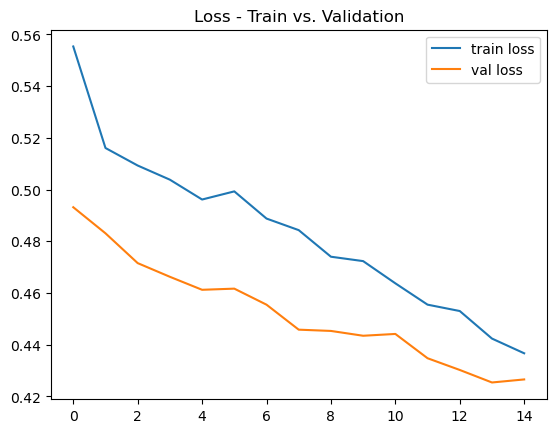

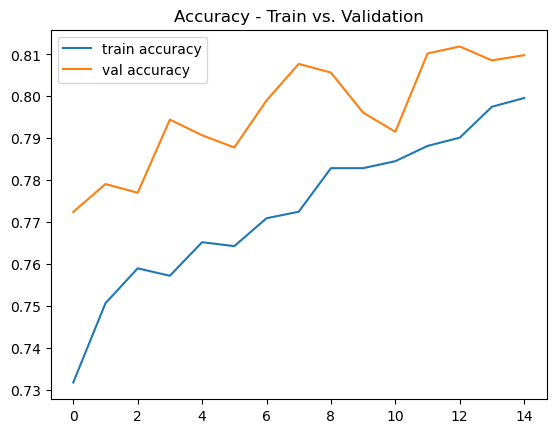

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss - Train vs. Validation")
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['base_accuracy'], label='train accuracy')
plt.plot(history.history['val_base_accuracy'], label='val accuracy')
plt.legend()
plt.title("Accuracy - Train vs. Validation")
plt.show()


In [75]:
df.head()

,US_Number,Diagnosis_appendicitis,Diagnosis_no appendicitis,Severity_complicated,Severity_uncomplicated,Management_conservative,Management_primary surgical,Management_secondary surgical
0,882.0,True,False,False,True,True,False,False
1,883.0,False,True,False,True,True,False,False
2,884.0,False,True,False,True,True,False,False
3,886.0,False,True,False,True,True,False,False
4,887.0,True,False,False,True,True,False,False


11/11 [==============================] - 3s 183ms/step


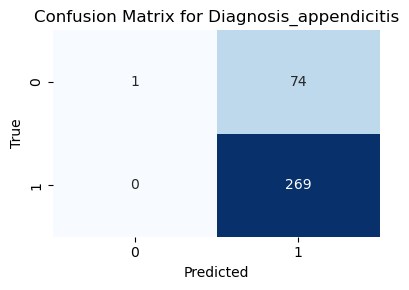

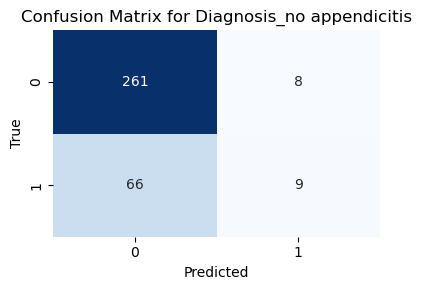

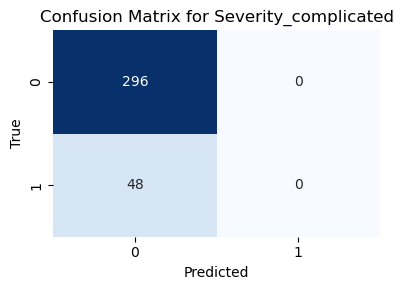

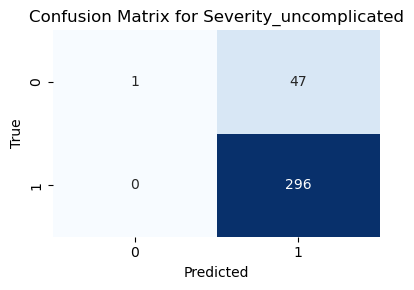

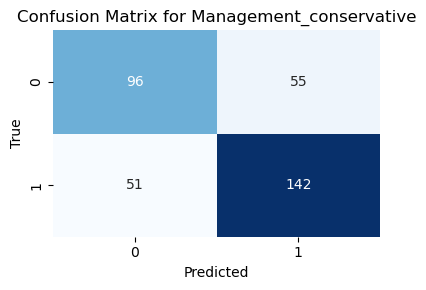

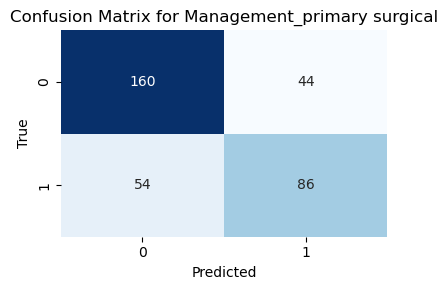

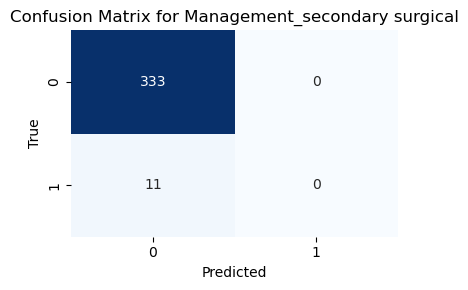

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Ensure correct input format
y_pred = model.predict([X_test, X_tab_test])  # Pass as list of inputs for image and tabular data
y_pred_binary = (y_pred > 0.5).astype(int)  # Apply threshold for binary classification

# Get the label names (assuming 'df' is your dataframe containing the target labels)
label_names = df.drop('US_Number', axis=1).columns.tolist()

# Get confusion matrices for each label
conf_matrices = multilabel_confusion_matrix(y_test, y_pred_binary)

# Plot each confusion matrix
for i, cm in enumerate(conf_matrices):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {label_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()